In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# read data 1 and refine dataframe
data1 = pd.read_csv("data1.csv")
data1['date'] = data1['date'].apply(lambda x: x.split(',')[1])
data1 = data1[data1.userscore != "tbd"]
data1.userscore = data1.userscore.apply(np.float64)
data1.userscore=pd.to_numeric(data1.userscore)
data1['userscore']=data1['userscore']*10
data1.userscore = data1.userscore.apply(np.int64)
data1.date = data1.date.apply(np.int64)

#read csv file that merges data 2 and 3
data2 = pd.read_csv('combo2.csv')
data2 = data2.rename(columns = {'release_Date':'date','user_Score':'userscore','title':'name','Critic_Score':'metascore'})
data2.date = data2.date.apply(np.int64)
print("data1 columns: ",data1.columns)
print("data2 columns: ",data2.columns)

data2 = data2.drop('Unnamed: 0', axis = 1)
data1

data1 columns:  Index(['metascore', 'name', 'console', 'userscore', 'date'], dtype='object')
data2 columns:  Index(['Unnamed: 0', 'name', 'console', 'date', 'tot_sale', 'metascore',
       'userscore'],
      dtype='object')


,metascore,name,console,userscore,date
0,97,Grand Theft Auto V,PS3,83,2013
1,97,Grand Theft Auto V,X360,83,2013
2,95,The Last of Us,PS3,92,2013
3,94,BioShock Infinite,PS3,85,2013
4,94,BioShock Infinite,PC,86,2013
5,93,BioShock Infinite,X360,85,2013
6,93,Super Mario 3D World,WIIU,89,2013
7,92,Fire Emblem: Awakening,3DS,91,2013
8,92,Rayman Legends,WIIU,87,2013
9,91,Fez,PC,67,2013


In [44]:
# merge data 1 2 and 3
merge_list = ['name','console','date','userscore','date','metascore']
final_comb = pd.merge(data1, data2, on= merge_list, how = 'outer' ,indicator=False)
final_comb = final_comb.dropna()
final_comb

metascore     int64
name         object
console      object
userscore     int64
date          int64
dtype: object

name          object
console       object
date           int64
tot_sale     float64
metascore    float64
userscore    float64
dtype: object


,metascore,name,console,userscore,date,tot_sale
3,94,BioShock Infinite,PS3,85,2013,1.69
5,93,BioShock Infinite,X360,85,2013,1.93
10,91,Rayman Legends,PS3,87,2013,0.58
17,90,Rayman Legends,X360,82,2013,0.43
39,87,FIFA 14,PS4,63,2013,3.01
47,87,NBA 2K14,X360,49,2013,2.52
52,86,Saints Row IV,PC,74,2013,0.19
61,86,DmC: Devil May Cry,X360,51,2013,0.44
62,86,Assassin's Creed IV: Black Flag,X360,79,2013,3.30
64,86,Diablo III,PS3,64,2013,1.91


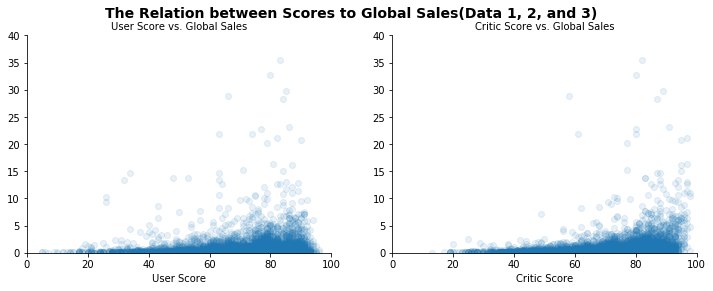

In [49]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (12,4))

#labels
fig.suptitle("The Relation between Scores to Global Sales(Data 1, 2, and 3)", fontsize = 14, fontweight = "bold") 
ax[0].set_title("User Score vs. Global Sales", fontsize = 10) 
ax[1].set_title("Critic Score vs. Global Sales", fontsize = 10)

count = 0
name_list = ['userscore','metascore']

corr_mat1 = final_comb.corr()
#cr = corr_mat.user_Score.tot_sale

for var in ax: 
    var.scatter(final_comb[name_list[count]], final_comb["tot_sale"],alpha= 0.1)
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.set_xlim(0,100)
    var.set_ylim(0,40)
    count+=1

ax[0].set_xlabel("User Score")
ax[1].set_xlabel("Critic Score")
plt.show()